# Exploratory Data Analysis

### Banking Marketing Campaign

In [73]:
#Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

# To supress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

***STEP 1: PROBLEM STATEMENT & DATA COLLECTION***

The bank uses phone calls to reach out to customers and conduct marketing campaigns targeting long-term deposits. The goal is to optimize these contacts by targeting customers who are most likely to stick with the product.

**Project Goal:**
Create a classification model to predict whether or not a customer will take out a long-term deposit based on data provided by the bank.

**1.1 PROBLEM STATEMENT**

**Customer Profile:**

* Which age groups are most likely to take up a long-term deposit?
* Is there a correlation between the type of work (job) or level of education (education) and the decision to hire the deposit?
* Are customers with personal loans or mortgages less likely to stick to long-term deposits?

**Demographic and Marital Status Analysis:**

* Is there a difference in the adherence rate between married, single and other marital statuses?
* Do customers of certain age groups or marital status tend to adhere more to long-term products?

**Contact History and Adhesion Probability:**

* Which contact method has the highest success rate?
* Does the duration of contact influence the probability of conversion? Is there an optimal duration to maximize adherence?
* Is there a relationship between the number of contacts made in previous campaigns (campaign, previous) and the probability of adherence?

**Temporal Analysis:**

*  Does the month (month) or day of the week (day_of_week) of the contact affect the probability of adherence?
* Do success rates vary throughout the year or across days of the week?

**Economic Indicators and Customer Behavior:**

* How do macroeconomic variables such as the 3-month EURIBOR rate (euribor3m) or employment rate (emp.var.rate) influence customers' decision?
* Is there a relationship between the consumer confidence index (cons.conf.idx) and the willingness of customers to join the deposit?

**Previous Campaign Analysis:**

* How does the result of previous campaigns (poutcome) influence customers’ decisions?
* Are customers who were contacted in previous campaigns more likely to participate in this campaign?

**Customer Profile and Product Adherence:**

* Is there a common profile among customers who subscribe to long-term deposits? How do age, marital status, type of work and education level correlate with adherence?
* Is there a pattern in clients showing a greater propensity to accept long-term investment products?

**1.2. DATA COLLECTION**

In [74]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [75]:
df.to_csv("../data/raw/bank_data.csv", index=False)

***STEP 2: EXPLORATION & DATA CLEANING***

***2.1. EXPLORATION***

#### 2.1.1. Understanding the features

* age. Age of customer (numeric)
* job. Type of job (categorical)
* marital. Marital status (categorical)
* education. Level of education (categorical)
* default. Do you currently have credit (categorical)
* housing. Do you have a housing loan (categorical)
* loan. Do you have a personal loan? (categorical)
* contact. Type of contact communication (categorical)
* month. Last month in which you have been contacted (categorical)
* day_of_week. Last day on which you have been contacted (categorical)
duration. Duration of previous contact in seconds (numeric)
* campaign. Number of contacts made during this campaign to the customer (numeric)
* pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
* previous. Number of contacts made during the previous campaign to the customer (numeric)
* poutcome. Result of the previous marketing campaign (categorical)
* emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
* cons.price.idx. Consumer price index. Monthly indicator (numeric)
* cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
* euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
* nr.employed. Number of employees. Quarterly indicator (numeric)
* y. TARGET. Whether the customer takes out a long-term deposit or not (categorical)

In [76]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(41188, 21)


In [77]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [78]:
# Obtaining Dataset statistics description:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [101]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

# Display results
print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))


Data types present in the dataset: [dtype('int64') dtype('O') dtype('float64')]
Number of categorical variables: 11
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Number of numerical variables: 10
Numerical variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##### Statements

* This DataFame is composed by 41 188 rows and 21 columns (variables). 
* There are no variables with null values. 
* The data has:
    * **11 categorical variables** - 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' and 'y'.
    * **10 numerical variables** - 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed';
    

In [84]:
# Transforming the unknown and nonexistent values ​​into NaN so that we can process and fill them.
df.replace(['unknown', 'nonexistent'], np.nan, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,NaN,-1.1,94.767,-50.8,1.028,4963.6,yes


#### 2.1.2. Identifying Null Values in each feature

In [ ]:
# Transforming 'unknown' and 'nonexistent' values into NaN for consistent handling of missing data
df.replace(['unknown', 'nonexistent'], np.nan, inplace=True)

# Display the modified DataFrame
df.head()  


Missing values ​​by column:
job            330
marital         80
education     1731
default       8597
housing        990
loan           990
poutcome     35563
dtype: int64


In [86]:
# another option to obtain the total number of null values in each column:
# df.isnull().sum()

***2.2. ELIMINATE DUPLICATES***

In [95]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


***2.3. ELIMINATE IRRELEVANT INFORMATION***

* all variables will be kept.

In the early stages of developing a classification model to predict whether or not a customer will take out a long-term deposit, I chose to keep all variables because I do not yet know the impact of each variable on the model.

### Dealing with null values (extra step needed)

In [88]:
# Get the percentage of NaN values 
df.isnull().sum().sort_values(ascending=False)

poutcome          35551
default            8596
education          1730
housing             990
loan                990
job                 330
marital              80
age                   0
contact               0
day_of_week           0
duration              0
campaign              0
month                 0
pdays                 0
previous              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [97]:
# Creating a df.copy to work on it
df_copy=df.copy()

In [98]:
# Fill NaN values
# Fill missing values ​​with the mode (most frequent value) of each column; since these are categorical variables
columns_to_fill = ['poutcome', 'default', 'education', 'housing', 'loan', 'job', 'marital']
for col in columns_to_fill:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

# Verificar se todos os valores nulos foram preenchidos
df.isnull().sum()


df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

***STEP 3: ANALYSIS OF UNIVARIATE VARIABLES***

**3.1. ANALYSIS OF CATEGORICAL VARIABLES**

In [102]:
# Split the original dataframe by numerical and categorical values

num = ['int64', 'float64']
cat = ['O']

df_numerical = df.select_dtypes(num)
df_categorical = df.select_dtypes(cat)

In [103]:
df_categorical.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,failure,no
1,services,married,high.school,no,no,no,telephone,may,mon,failure,no
2,services,married,high.school,no,yes,no,telephone,may,mon,failure,no


In [114]:
def plot_categorical_variables(df_categorical, hue='y'):
    """
    Plots count charts for all categorical variables in `df_categorical` using a 3-column layout.

    Parameters:
    - df_categorical: DataFrame containing only the categorical columns to analyze.
    - hue: Color variable for the columns (optional), like the target variable if relevant.
    """
    
    # Obtém todas as colunas categóricas de `df_categorical`
    categorical_columns = df_categorical.columns.tolist()

    # Configura o layout dos subplots para ter 3 colunas
    num_cols = 3
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))

    # Achata o array de eixos para facilitar a iteração
    axes = axes.flatten()

    # Loop para criar gráficos de contagem para cada variável categórica
    for i, col in enumerate(categorical_columns):
        sns.countplot(ax=axes[i], data=df_categorical, x=col, hue=hue)
        axes[i].set_title(f"{col}", fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=90)

    # Remove eixos extras se houver menos colunas que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




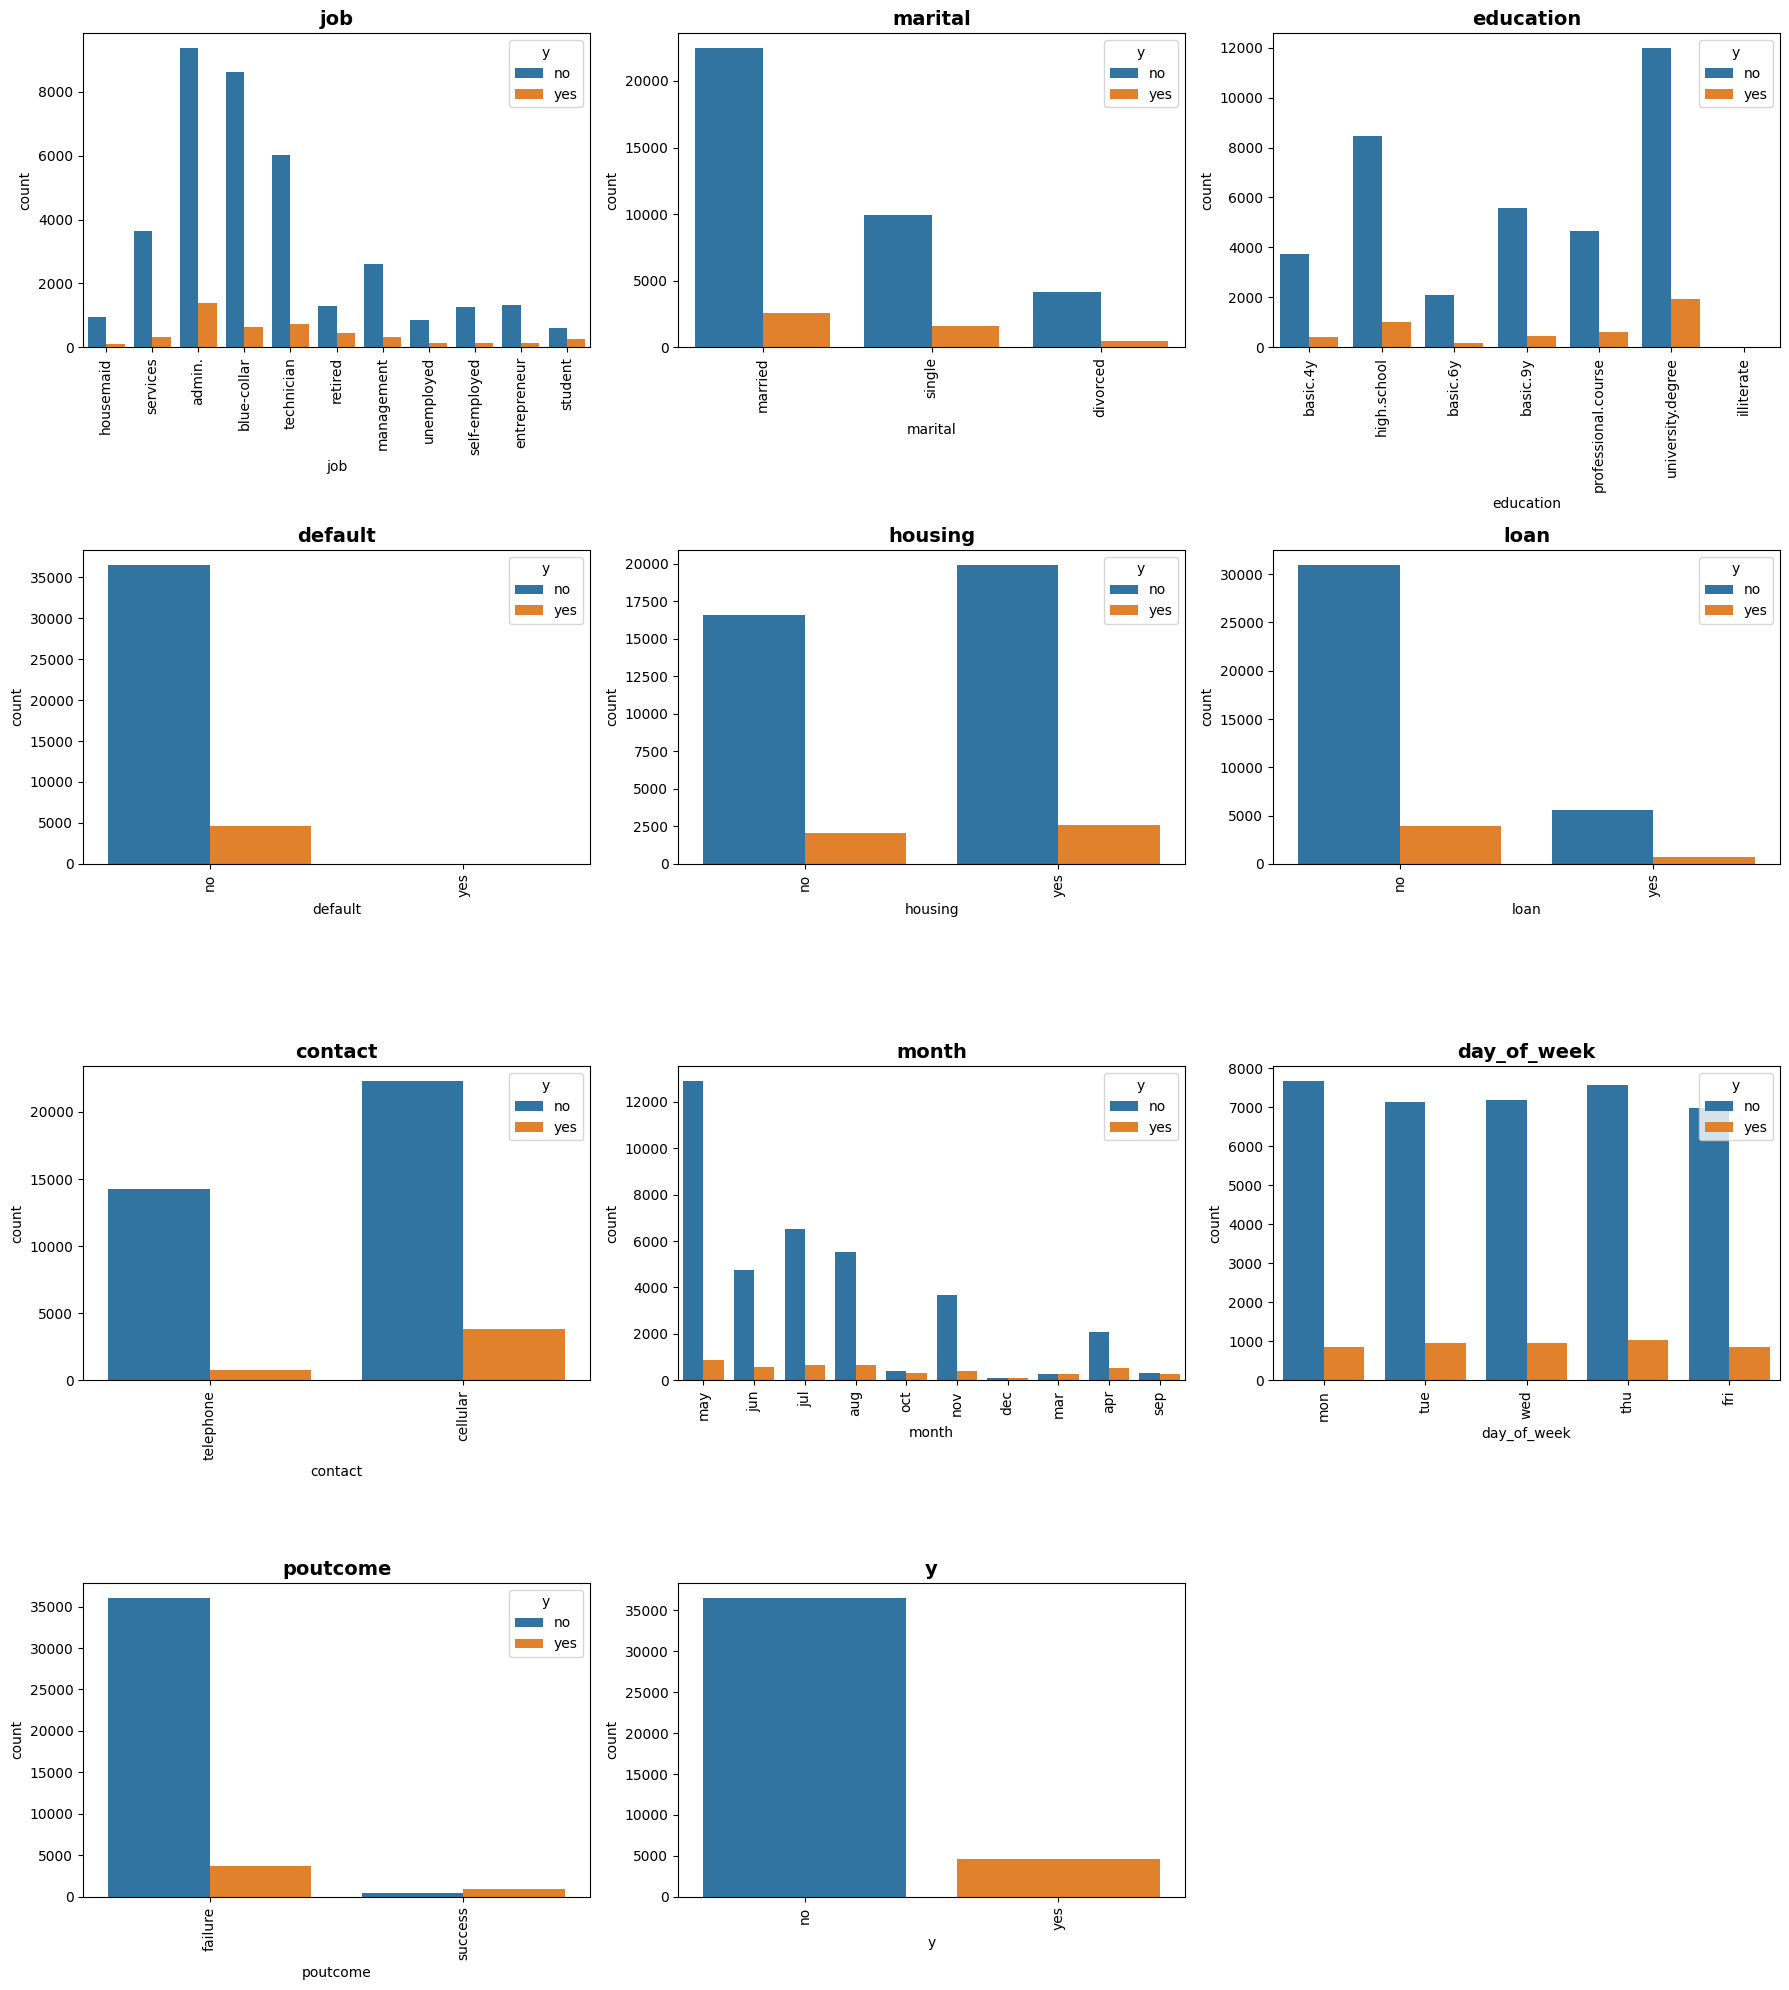

In [ ]:
plot_categorical_variables(df_categorical, hue='y')


#### Statements 
With the representation of each variable by plotting their histogram, it's possible to determine that:

* ****job**** - The adoption rate (indicated by the proportion of "yes" in relation to the total) varies between professions. Most clients are in professions such as "admin.", "blue-collar" and "technician". However, it is possible to observe that some categories with fewer clients, such as "student" and "housemaid", have a slightly higher adoption rate, indicating potential interest of these groups in long-term deposits;

* ****marital**** - The majority of clients are married, followed by singles. However, singles and divorced individuals show a slightly higher adoption rate compared to married clients;

* ****education**** -  Most clients have secondary or tertiary education, with similar adoption rates across education levels. There isn’t a clear difference in adoption based on education;

* ****default**** - Most clients do not have active credit (default). Clients in default show a much lower adoption rate, indicating that credit status negatively influences adoption;

* ****housing**** - Most clients have a housing loan, but those without one show a slightly higher adoption rate. Clients without a mortgage may be more open to adopting the product;

* ****loan**** - Similar to housing loans, most clients do not have personal loans, and the adoption rate is lower among those who do have loans. This suggests a possible reluctance to adopt due to existing financial commitments;

**note:** Customers without active credit, without a mortgage loan, and without a personal loan show a slightly higher propensity to adopt the long-term banking product. This profile may indicate that customers with fewer financial commitments (less debt) are more inclined to accept the new product, which can be useful information for segmenting marketing campaigns;

* ****contact**** - Most contacts are made via mobile phone, which also has a higher adoption rate compared to landlines. Mobile contacts appear to be more effective;

* ****month**** - May has the highest volume of contacts, but months like March and December, with fewer contacts, show a slightly higher adoption rate, suggesting that seasonality may influence the adoption decision;

* ****day_of_week**** - There is no significant variation in the adoption rate across the days of the week, indicating that the contact day has little impact on adoption;

* ****poutcome**** - Clients who had a successful outcome in previous campaigns have a significantly higher adoption rate in this campaign, suggesting that past campaign success can be a good indicator for future campaign targeting;

* ****y (target)**** - Most clients did not opt for the long-term deposit, reflecting a low overall adoption rate. This suggests limited appeal of the product among clients or potential improvement areas in segmentation strategies.





**3.1.1. ELIMINATING IRRELEVANT INFORMATION**

Based on the above, I considered to discard:

* `month`
* `day_of_week`


These variables are unlikely to have a strong influence on whether a customer subscribes to a long-term deposit, as they are more indicative of scheduling than customer characteristics.

**3.2. ANALYSIS OF NUMERICAL VARIABLES**

In [116]:
df_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [134]:
def plot_numerical_variables(df_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `df_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - df_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `df_numerical`.
    """
    # Get all numerical columns from `df_numerical`
    numerical_columns = df_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Divided by 2 columns, rounding up

    # Set up the layout of subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 4))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define a fixed color palette
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Ensures the color index stays within the palette length
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the histogram
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col.capitalize(), fontweight='bold')  # Set the title in bold for the boxplot
        axes[i * 2 + 1].set(xlabel=None)  # Remove x label from boxplot for consistency

    # Remove extra axes if there is an odd number of variables
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to avoid overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


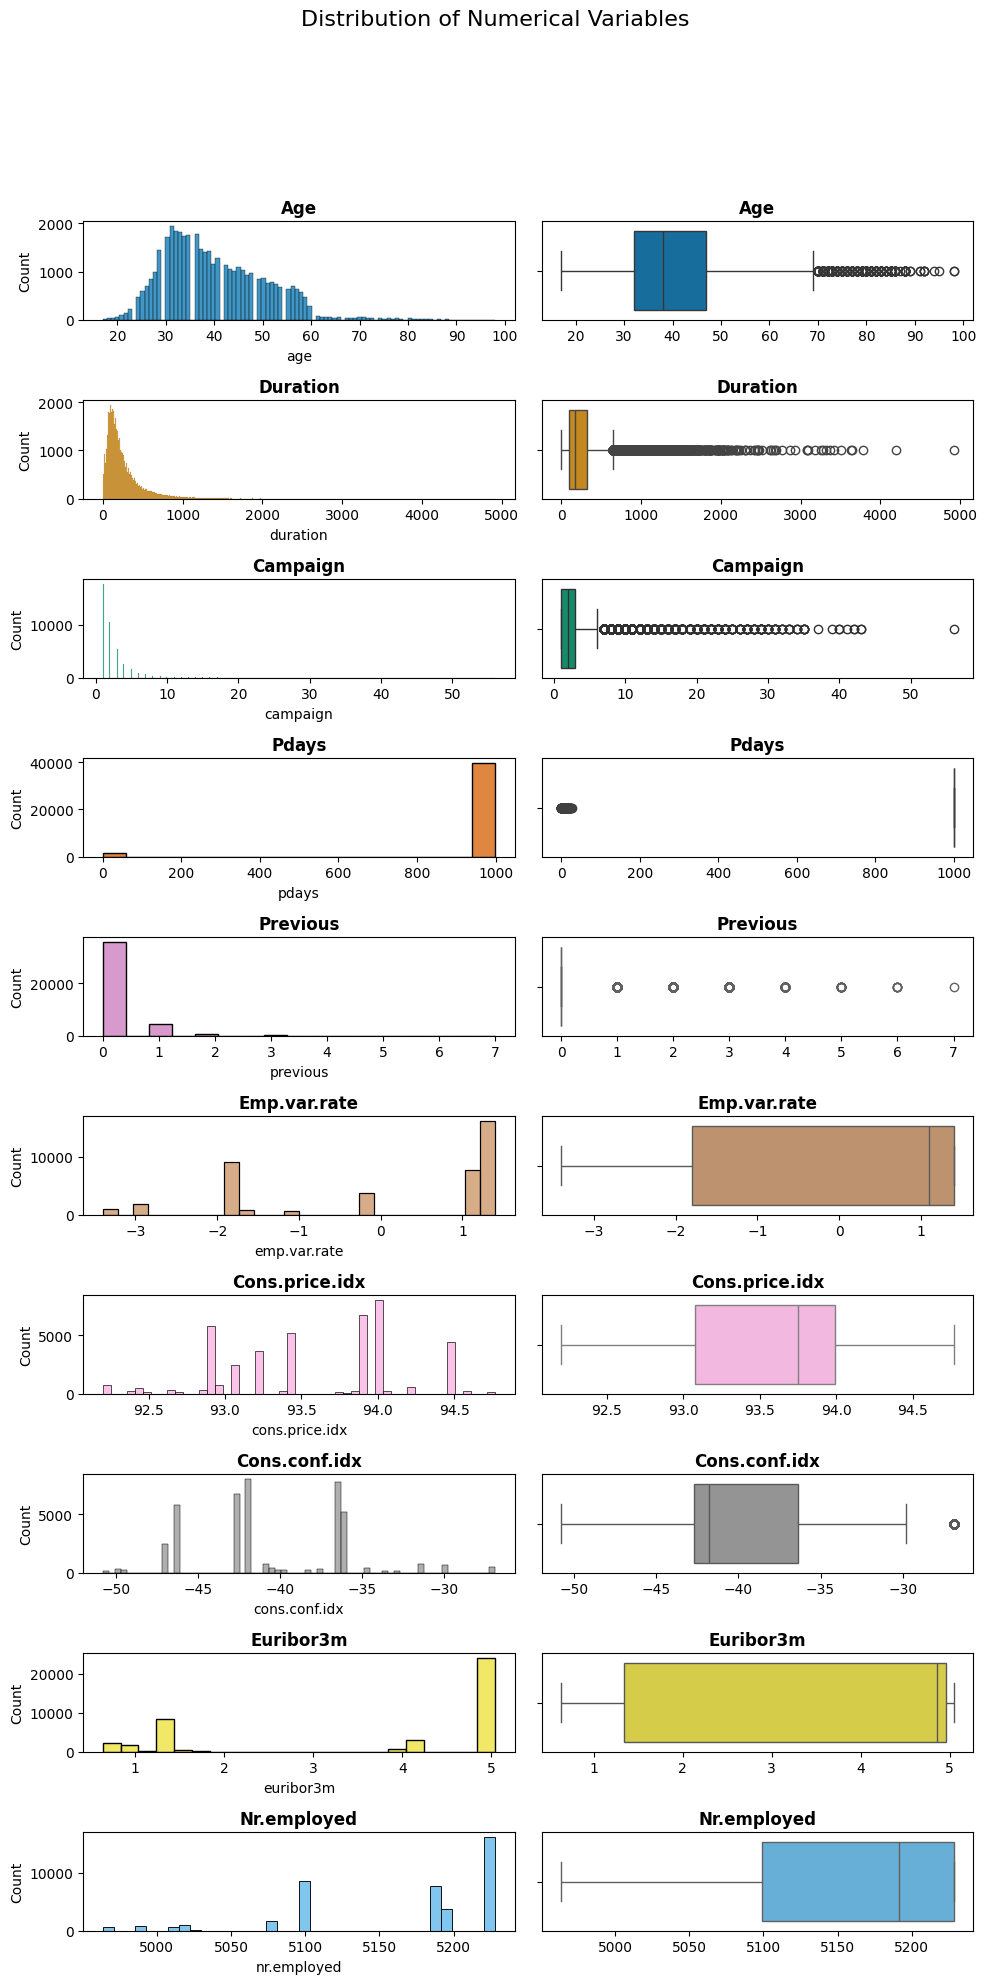

In [135]:
# Obtaining numerical variables graphs
plot_numerical_variables(df_numerical, hue='y')

#### Statements

 
* **age (Age of customer):**  Most clients are in the 20-60 age range, with a slightly asymmetric distribution, indicating a higher concentration of working-age clients (in the 30-50 age range). There are some outliers, especially those over 70 years old; these should be kept, as they represent a small group;

* **duration (Duration of previous contact in seconds):** Most call durations are short, with a concentration around low values. There are significant outliers at higher durations, indicating that some contacts were very long. Longer contacts may indicate a higher probability of campaign success, and are therefore a relevant variable;

* **campaign (Number of contacts made during this campaign to the customer):** Most clients were contacted only a few times during the current campaign, with most having one or two attempts. There are outliers indicating some clients who were contacted more than 10 times, which is less common;

* **pdays (Number of days that elapsed since the last campaign until the customer was contacted):** The distribution shows that most clients have a value of 999 for this variable, meaning they were not contacted in previous campaigns. This value acts as a specific "marker" for new contacts, so it should be treated as a separate category or replaced with NaN to indicate no previous contact;

* **previous (Number of contacts made during the previous campaign to the customer):**  Most customers have not been contacted before (value 0), while some had multiple contacts in past campaigns; which may affect the success rate;

* **Emp.var.rate:** The employment variation rate is distributed over a few distinct values. There aren’t many outliers, with most observations concentrated at higher values (above 0);

* **Cons.price.idx:** The consumer price index distribution is concentrated around a few specific values, reflecting little variation over time. There are no significant outliers;

* **Cons.conf.idx:** The consumer confidence index spans a wide range, but most values are concentrated between -50 and -30. There are a few minor outliers;

* **Euribor3m:** The 3-month Euribor rate is concentrated around a few specific values, with most clients having a rate of around 5%. This reflects economic conditions of a specific period;

* **nr.employed (Number of employees):** The number of employees is also concentrated around a few specific values, with few outliers. Most data points are within a small range, indicating employment stability over time.


**Outliers:** Variables like `duration`, `campaign`, `pdays`, and `previous` show significant outliers, suggesting a need for specific treatment if these extreme values negatively impact modeling.

**Economic Stability:** Variables such as `emp.var.rate`, `cons.price.idx`, `euribor3m`, and `nr.employed` reflect economic stability over certain periods, showing limited variation.

**3.2.1. ELIMINATING IRRELEVANT INFORMATION**

I decided to keep variables that directly relate to customer behavior, previous engagement, and broader economic sentiment, as these are more likely to influence an individual’s decision on long-term deposits.

**Retain:** `age`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.conf.idx`, `euribor3m` and `nr.employed`.

**Remove:** `duration`, `previous` and `cons.price.idx`. 

**3.3. NEW DATASET- after discarding irrelevant information**

After analyzing the behavior of the variables, I consider eliminating some:

In [142]:
# Define the list of columns to remove (both categorical and numerical)
columns_to_remove = ['month', 'day_of_week', 'duration', 'previous', 'cons.price.idx']

# Drop the specified columns from the DataFrame and store the result in a new DataFrame `df_refined`
df_refined = df.drop(columns=columns_to_remove)

# Display the structure of the updated DataFrame to verify the changes
print("Updated DataFrame structure after removing columns:")
print(df_refined.info())



Updated DataFrame structure after removing columns:
<class 'pandas.core.frame.DataFrame'>
Index: 41174 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41174 non-null  int64  
 1   job            41174 non-null  object 
 2   marital        41174 non-null  object 
 3   education      41174 non-null  object 
 4   default        41174 non-null  object 
 5   housing        41174 non-null  object 
 6   loan           41174 non-null  object 
 7   contact        41174 non-null  object 
 8   campaign       41174 non-null  int64  
 9   pdays          41174 non-null  int64  
 10  poutcome       41174 non-null  object 
 11  emp.var.rate   41174 non-null  float64
 12  cons.conf.idx  41174 non-null  float64
 13  euribor3m      41174 non-null  float64
 14  nr.employed    41174 non-null  float64
 15  y              41174 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage

In [143]:
# Current dataset
df_refined.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,failure,1.1,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,1,999,failure,1.1,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,failure,1.1,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,failure,1.1,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,failure,1.1,-36.4,4.857,5191.0,no


***STEP 4: ANALYSIS OF MULTIVARIATE VARIABLES***

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

**4.1. Encoding Categorical Values and Saving JSON files**

In [144]:
# Criar uma cópia do DataFrame original para aplicar as substituições de encoding
df_n = df_refined.copy()

In [ ]:
# Loop sobre cada coluna para criar e salvar o encoder como JSON
df_categorical = df_refined.select_dtypes(include='object').columns
os.makedirs('../data/interim/enc', exist_ok=True)

for col in df_categorical:
    # Obter valores únicos e criar o dicionário de encoding
    unique_values = list(df_refined[col].unique())
    encoder_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # Salvar o dicionário de encoding como um arquivo JSON
    with open(f'../data/interim/enc/{col}_n.json', 'w') as f:
        json.dump(encoder_dict, f)

In [146]:
for col in df_categorical:
    with open(f'../data/interim/enc/{col}_n.json', 'r') as f:
        encoder_dict = json.load(f)
    df_n[col] = df_n[col].map(encoder_dict)

In [147]:
df_n.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,1,999,0,1.1,-36.4,4.857,5191.0,0
1,57,1,0,1,0,0,0,0,1,999,0,1.1,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,1,999,0,1.1,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,1,999,0,1.1,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,1,999,0,1.1,-36.4,4.857,5191.0,0


**4.1 NUMERICAL-NUMERICAL ANALYSIS**

In this bank marketing dataset, our variable of interest for bivariate analysis is `y`, which indicates whether a customer subscribed to the long-term deposit product. As a binary outcome variable, `y` represents the success of the bank’s marketing efforts. Analyzing how `y` varies in relation to other continuous numerical variables can help us identify potential factors that influence a customer's likelihood to subscribe. This analysis allows us to uncover patterns and correlations that could inform more targeted and effective marketing strategies.

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns. In this analysis I decided to create a correlation matrix to observe the relationship between numerical variables.

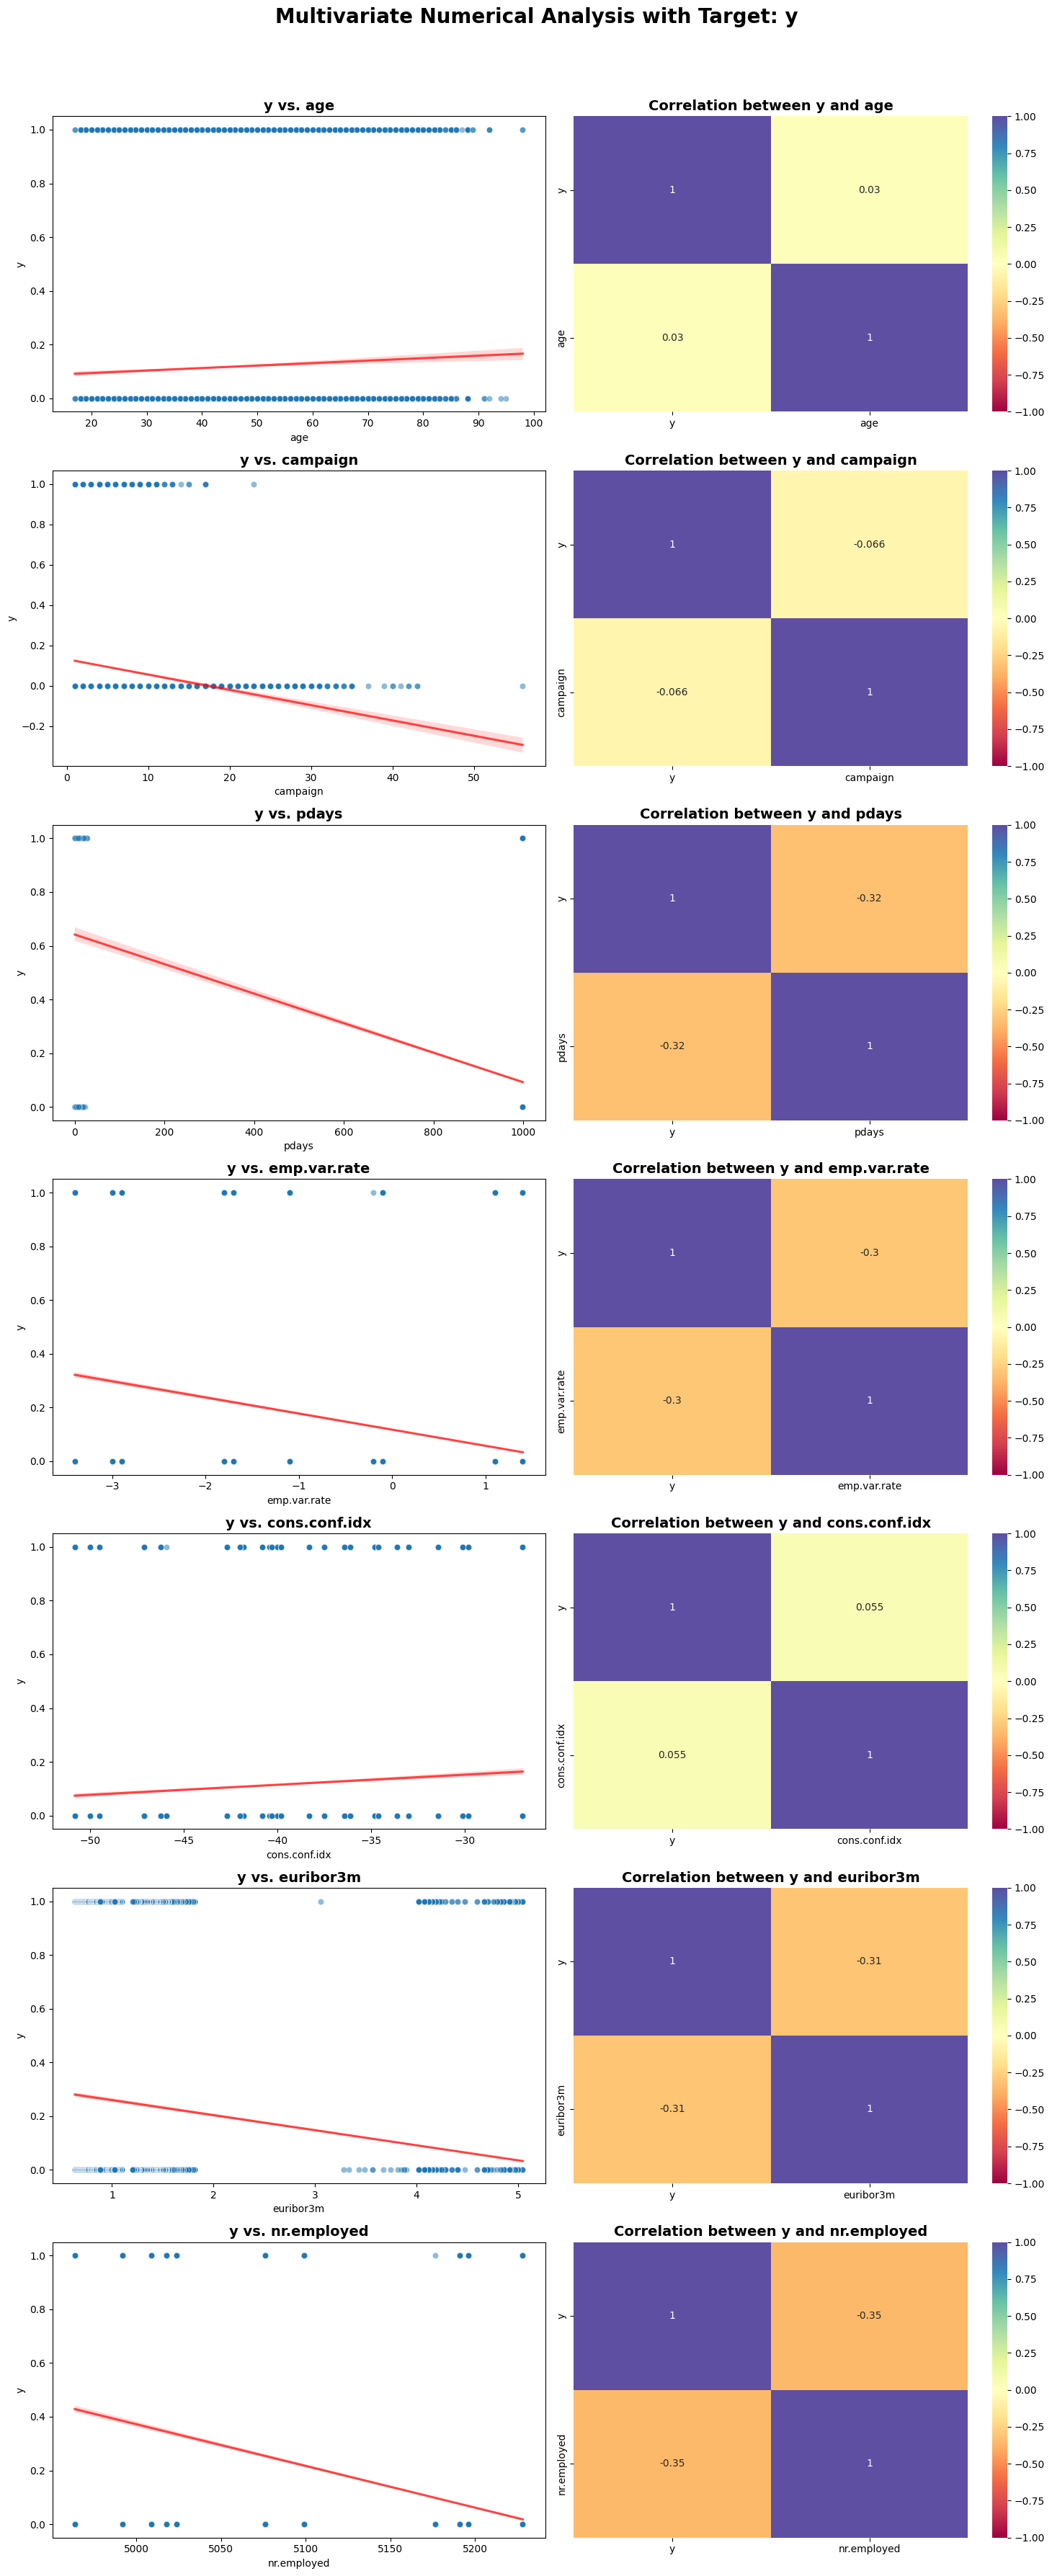

In [ ]:
def multivariate_numeric_analysis(df, target_variable, numerical_columns):
    """
    Generates scatter plots and correlation matrices between the variable of interest and other numerical variables.

    Parameters:
    - df: DataFrame containing the data.
    - target_variable: String representing the name of the variable of interest (must be in numerical format).
    - numerical_columns: List of strings with the names of the numerical columns for analysis.
    """
    # Subplots configuration
    num_vars = len(numerical_columns)
    fig, axes = plt.subplots(num_vars, 2, figsize=(15, num_vars * 5))
    fig.suptitle(f'Multivariate Numerical Analysis with Target: {target_variable}', fontsize=20, fontweight= 'bold', y=1.02)
    
    # Loop through numeric variables
    for i, col in enumerate(numerical_columns):
        # Scatterplot with regression line
        sns.scatterplot(ax=axes[i, 0], data=df_n, x=col, y=target_variable, alpha=0.5)
        sns.regplot(ax=axes[i, 0], data=df_n, x=col, y=target_variable, scatter=False, color='red', line_kws={"alpha":0.7})
        axes[i, 0].set_title(f'{target_variable} vs. {col}', fontsize=14, fontweight='bold')
        
        # Correlation matrix between the target variable and the numerical variable
        corr_data = df_n[[target_variable, col]].corr()
        sns.heatmap(ax=axes[i, 1], data=corr_data, annot=True, cmap='Spectral', cbar=True, vmin=-1, vmax=1)
        axes[i, 1].set_title(f'Correlation between {target_variable} and {col}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Usage example with the DataFrame df_refined, the variable of interest 'y_n' and a list of numeric variables
numerical_columns = ['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target_variable = 'y'
multivariate_numeric_analysis(df_n, target_variable, numerical_columns)

#### Statements

**Age vs. y_n:**

A relação entre a idade (age) e a variável de interesse (y_n) é praticamente inexistente, com uma correlação muito próxima de zero (0.03). Isso indica que a idade do cliente não tem um impacto significativo sobre a decisão de aderir ao produto de longo prazo.

**Campaign vs. y_n:**

A correlação entre o número de contatos na campanha atual (campaign) e y_n é negativa e fraca (-0.066). Isso sugere que, quanto mais vezes o cliente foi contatado na campanha atual, levemente menor é a probabilidade de aderência. Porém, essa relação é muito fraca e, sozinha, não é um bom preditor.

**Pdays vs. y_n:**

A variável pdays, que representa o número de dias desde que o cliente foi contatado em uma campanha anterior, possui uma correlação negativa mais expressiva com y_n (-0.32). Isso indica que clientes que foram contatados há muito tempo em campanhas anteriores tendem a ter uma probabilidade levemente menor de aderência. Esta correlação pode indicar que clientes recentemente contatados são mais propensos a aderir, mas a relação ainda não é muito forte.

**Emp.var.rate vs. y_n:**

A taxa de variação do emprego (emp.var.rate) tem uma correlação negativa moderada com y_n (-0.3). Esse resultado pode indicar que, em períodos de baixa variação de emprego, a probabilidade de adesão ao produto tende a ser um pouco maior. Porém, como a correlação ainda é moderada, isso sugere que esta variável, embora relevante, não é decisiva por si só.

**Cons.conf.idx vs. y_n:**

O índice de confiança do consumidor (cons.conf.idx) tem uma correlação muito fraca e positiva com y_n (0.055). Isso indica que a confiança do consumidor tem pouco ou nenhum impacto direto na decisão do cliente de aderir ao produto. A variável, neste caso, pode ser considerada de baixa relevância para prever a adesão.

**Euribor3m vs. y_n:**

A taxa de juros Euribor de 3 meses (euribor3m) apresenta uma correlação negativa moderada com y_n (-0.31), similar à variável de variação de emprego. Isso indica que taxas de juros mais altas estão associadas a uma probabilidade um pouco menor de adesão ao produto. Clientes podem estar mais relutantes em investir quando as taxas de juros estão elevadas, mas, como nas outras variáveis, a correlação é moderada.

**Nr.employed vs. y_n:**

O número de empregados (nr.employed) apresenta um coeficiente de correlação negativa moderada com y_n (-0.35). Isso sugere que, conforme o número de empregados aumenta, a probabilidade de adesão ao produto de longo prazo (y_n = 1) tende a diminuir. Isso pode refletir uma maior segurança econômica em que, com mais emprego, os clientes podem se sentir menos inclinados a buscar alternativas de investimento ou poupança.

**4.2 CATEGORICAL-CATEGORICAL ANALYSIS**

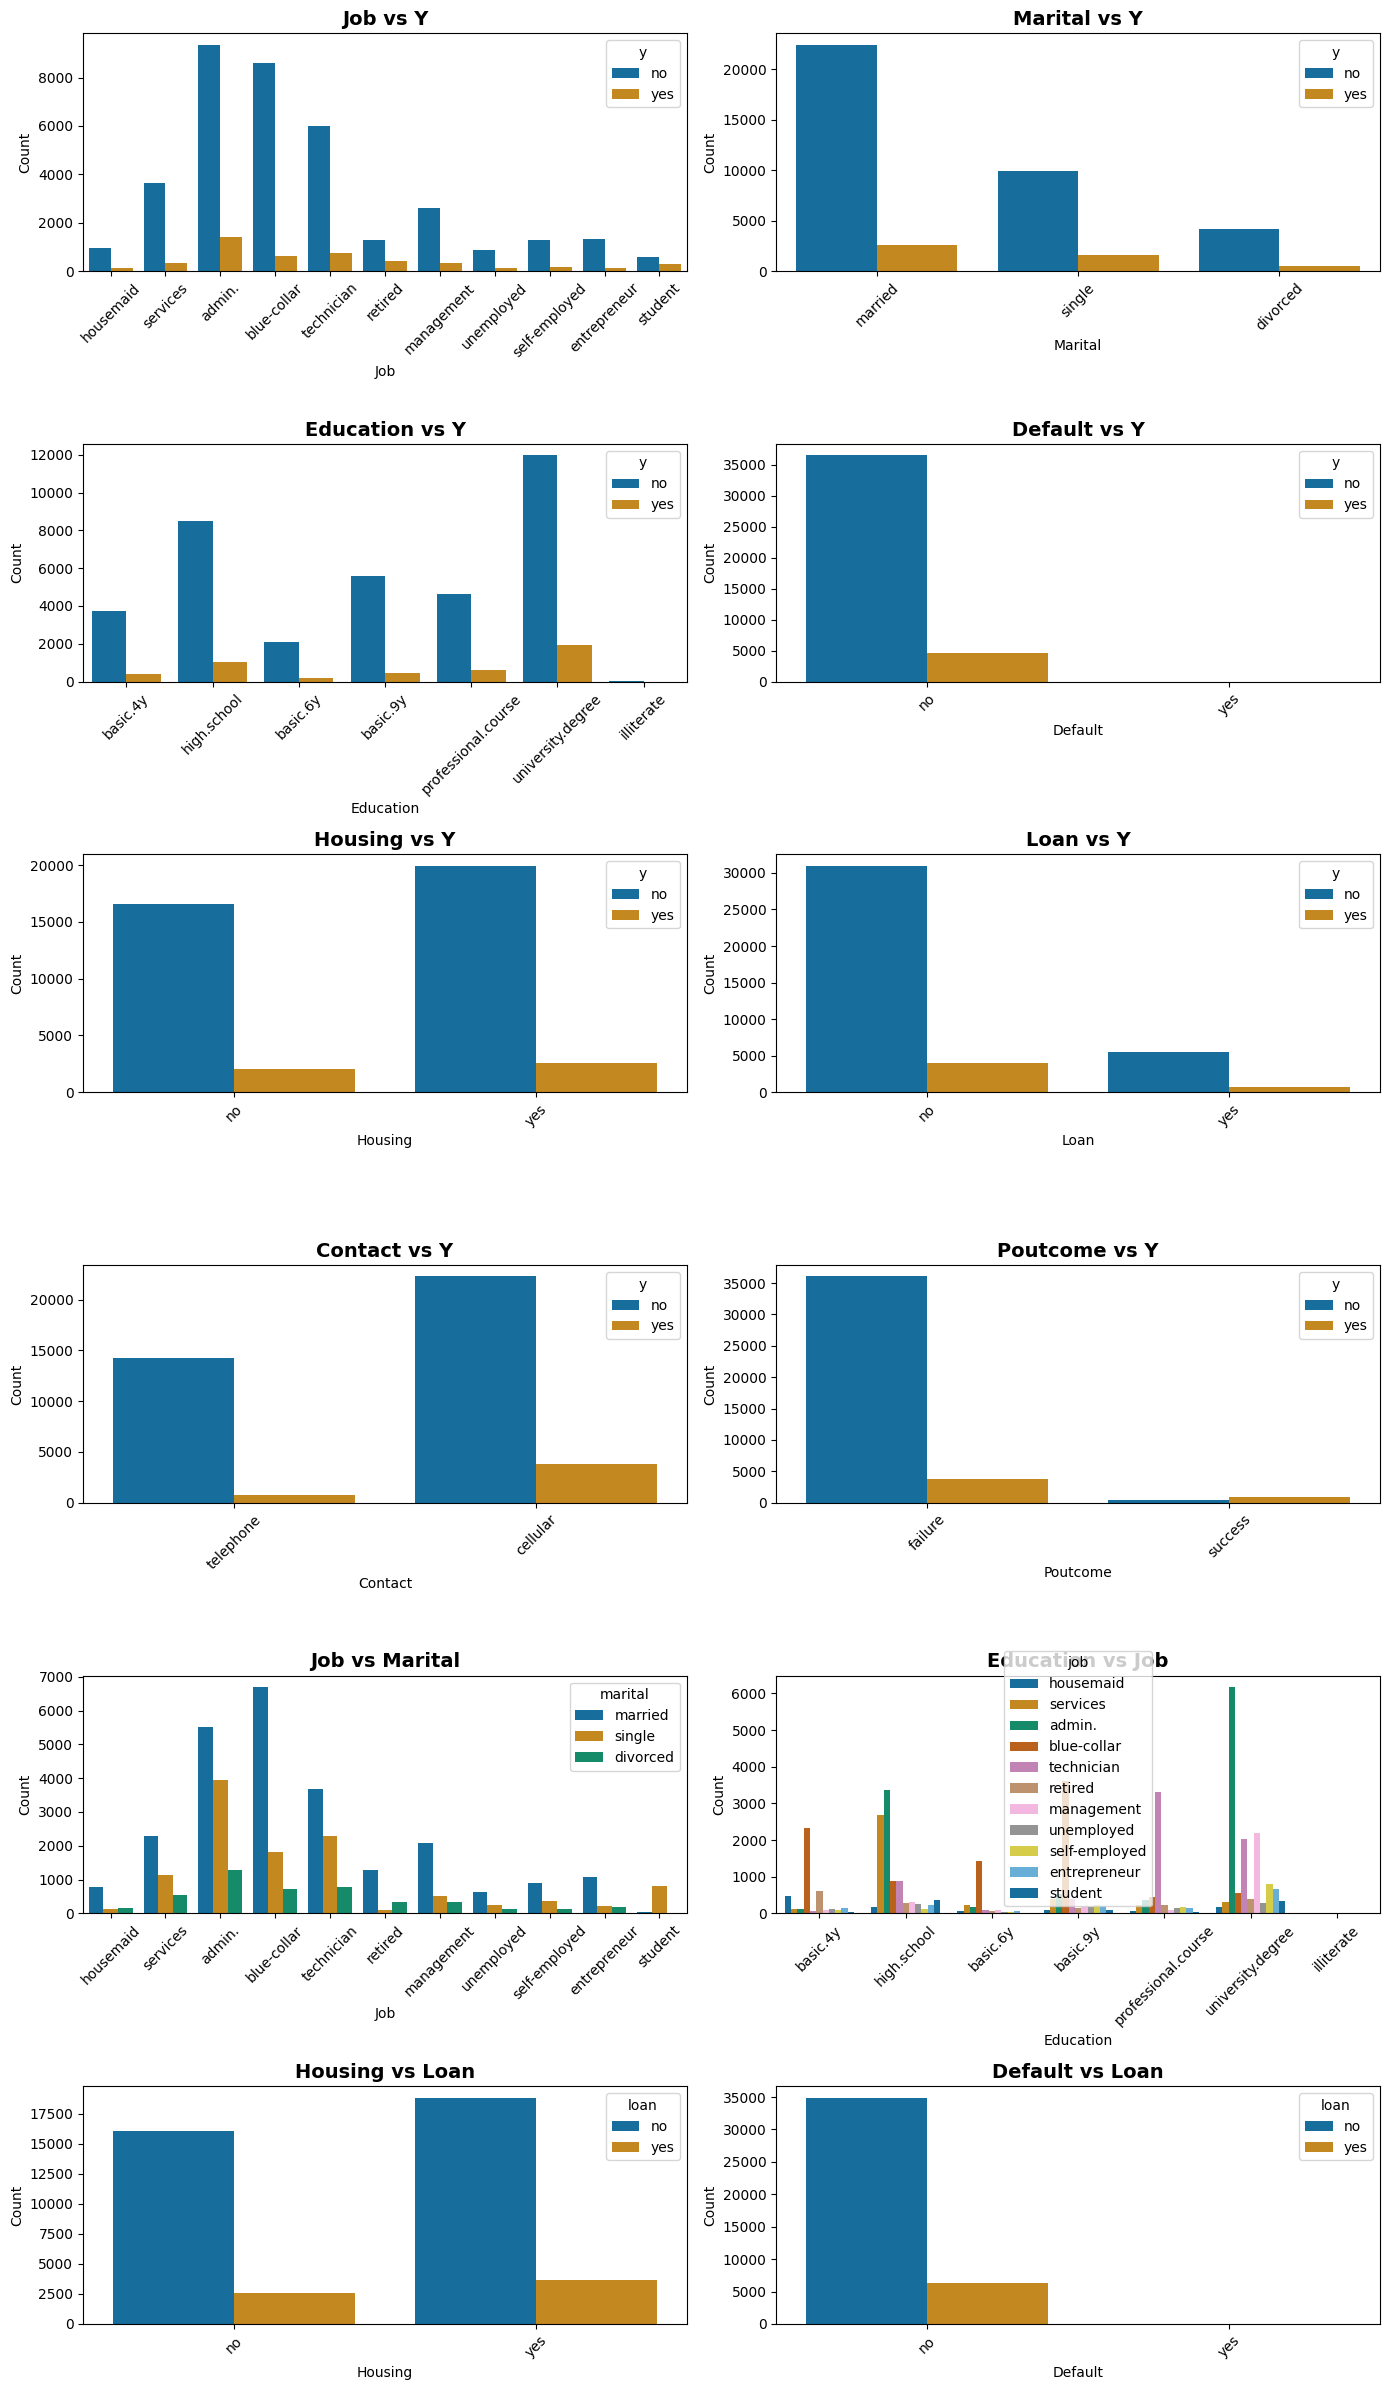

In [ ]:
# Defines categorical variables for cross-analysis
categorical_pairs = [
    ('job', 'y'),
    ('marital', 'y'),
    ('education', 'y'),
    ('default', 'y'),
    ('housing', 'y'),
    ('loan', 'y'),
    ('contact', 'y'),
    ('poutcome', 'y'),
    # Additional pairs to understand specific combinations
    ('job', 'marital'),
    ('education', 'job'),
    ('housing', 'loan'),
    ('default', 'loan')
]

# Calculate the number of rows required for 2 column layout
num_rows = (len(categorical_pairs) + 1) // 2

# Create figure and axes with 2 columns layout
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 4))
plt.subplots_adjust(hspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()


# Generate stacked bar plots for each pair in `categorical_pairs`
for i, (var1, var2) in enumerate(categorical_pairs):
    # Stacked bar plot for cross-lagged analysis
    sns.countplot(data=df_refined, x=var1, hue=var2, ax=axes[i], palette="colorblind")
    axes[i].set_title(f'{var1.capitalize()} vs {var2.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var1.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if there's an odd number of pairs
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustment
plt.tight_layout()
plt.show()



#### Statements

* **Job vs Marital:** The distribution of customers by occupation varies across marital statuses. For example, “married” is more prevalent across many occupations, while “single” is more common across “students” and “services.” This can provide insights for demographic targeting in campaigns.

* **Education vs Job:** Certain professions are more concentrated at specific levels of education. For example, professions such as "admin." and "blue-collar" are predominantly associated with high school, while "management" and "technician" have a wider distribution across different levels of education.

* **Housing vs Loan:** Most customers have only one type of financial commitment, and those without a home loan usually also do not have a personal loan. This profile can help target customers with a greater capacity to invest in new products.

* **Default vs Loan:** Most customers who do not have defaulted on their loans also do not have a personal loan, suggesting a possible aversion to debt. Customers who are already in debt or have defaulted on their loans are less likely to take out new financial products.

**4.1 NUMERICAL-NUMERICAL ANALYSIS**

In this bank marketing dataset, our variable of interest for bivariate analysis is `y`, which indicates whether a customer subscribed to the long-term deposit product. As a binary outcome variable, `y` represents the success of the bank’s marketing efforts. Analyzing how `y` varies in relation to other continuous numerical variables can help us identify potential factors that influence a customer's likelihood to subscribe. This analysis allows us to uncover patterns and correlations that could inform more targeted and effective marketing strategies.

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns. In this analysis I decided to create a correlation matrix to observe the relationship between numerical variables.

**4.3 CORRELATION MATRIX (CATEGORICAL-NUMERICAL) - COMPLETE**

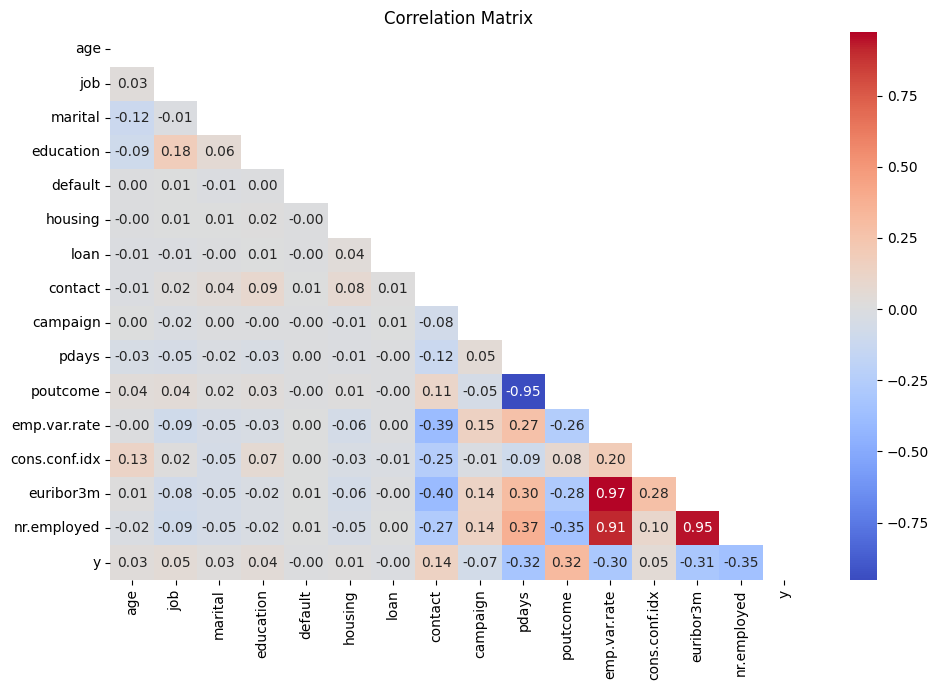

In [151]:
plt.figure(figsize=(10, 7))

sns.heatmap(df_n.corr(), annot=True, fmt=".2f", cmap='coolwarm', mask= np.triu(df_n.corr()))
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

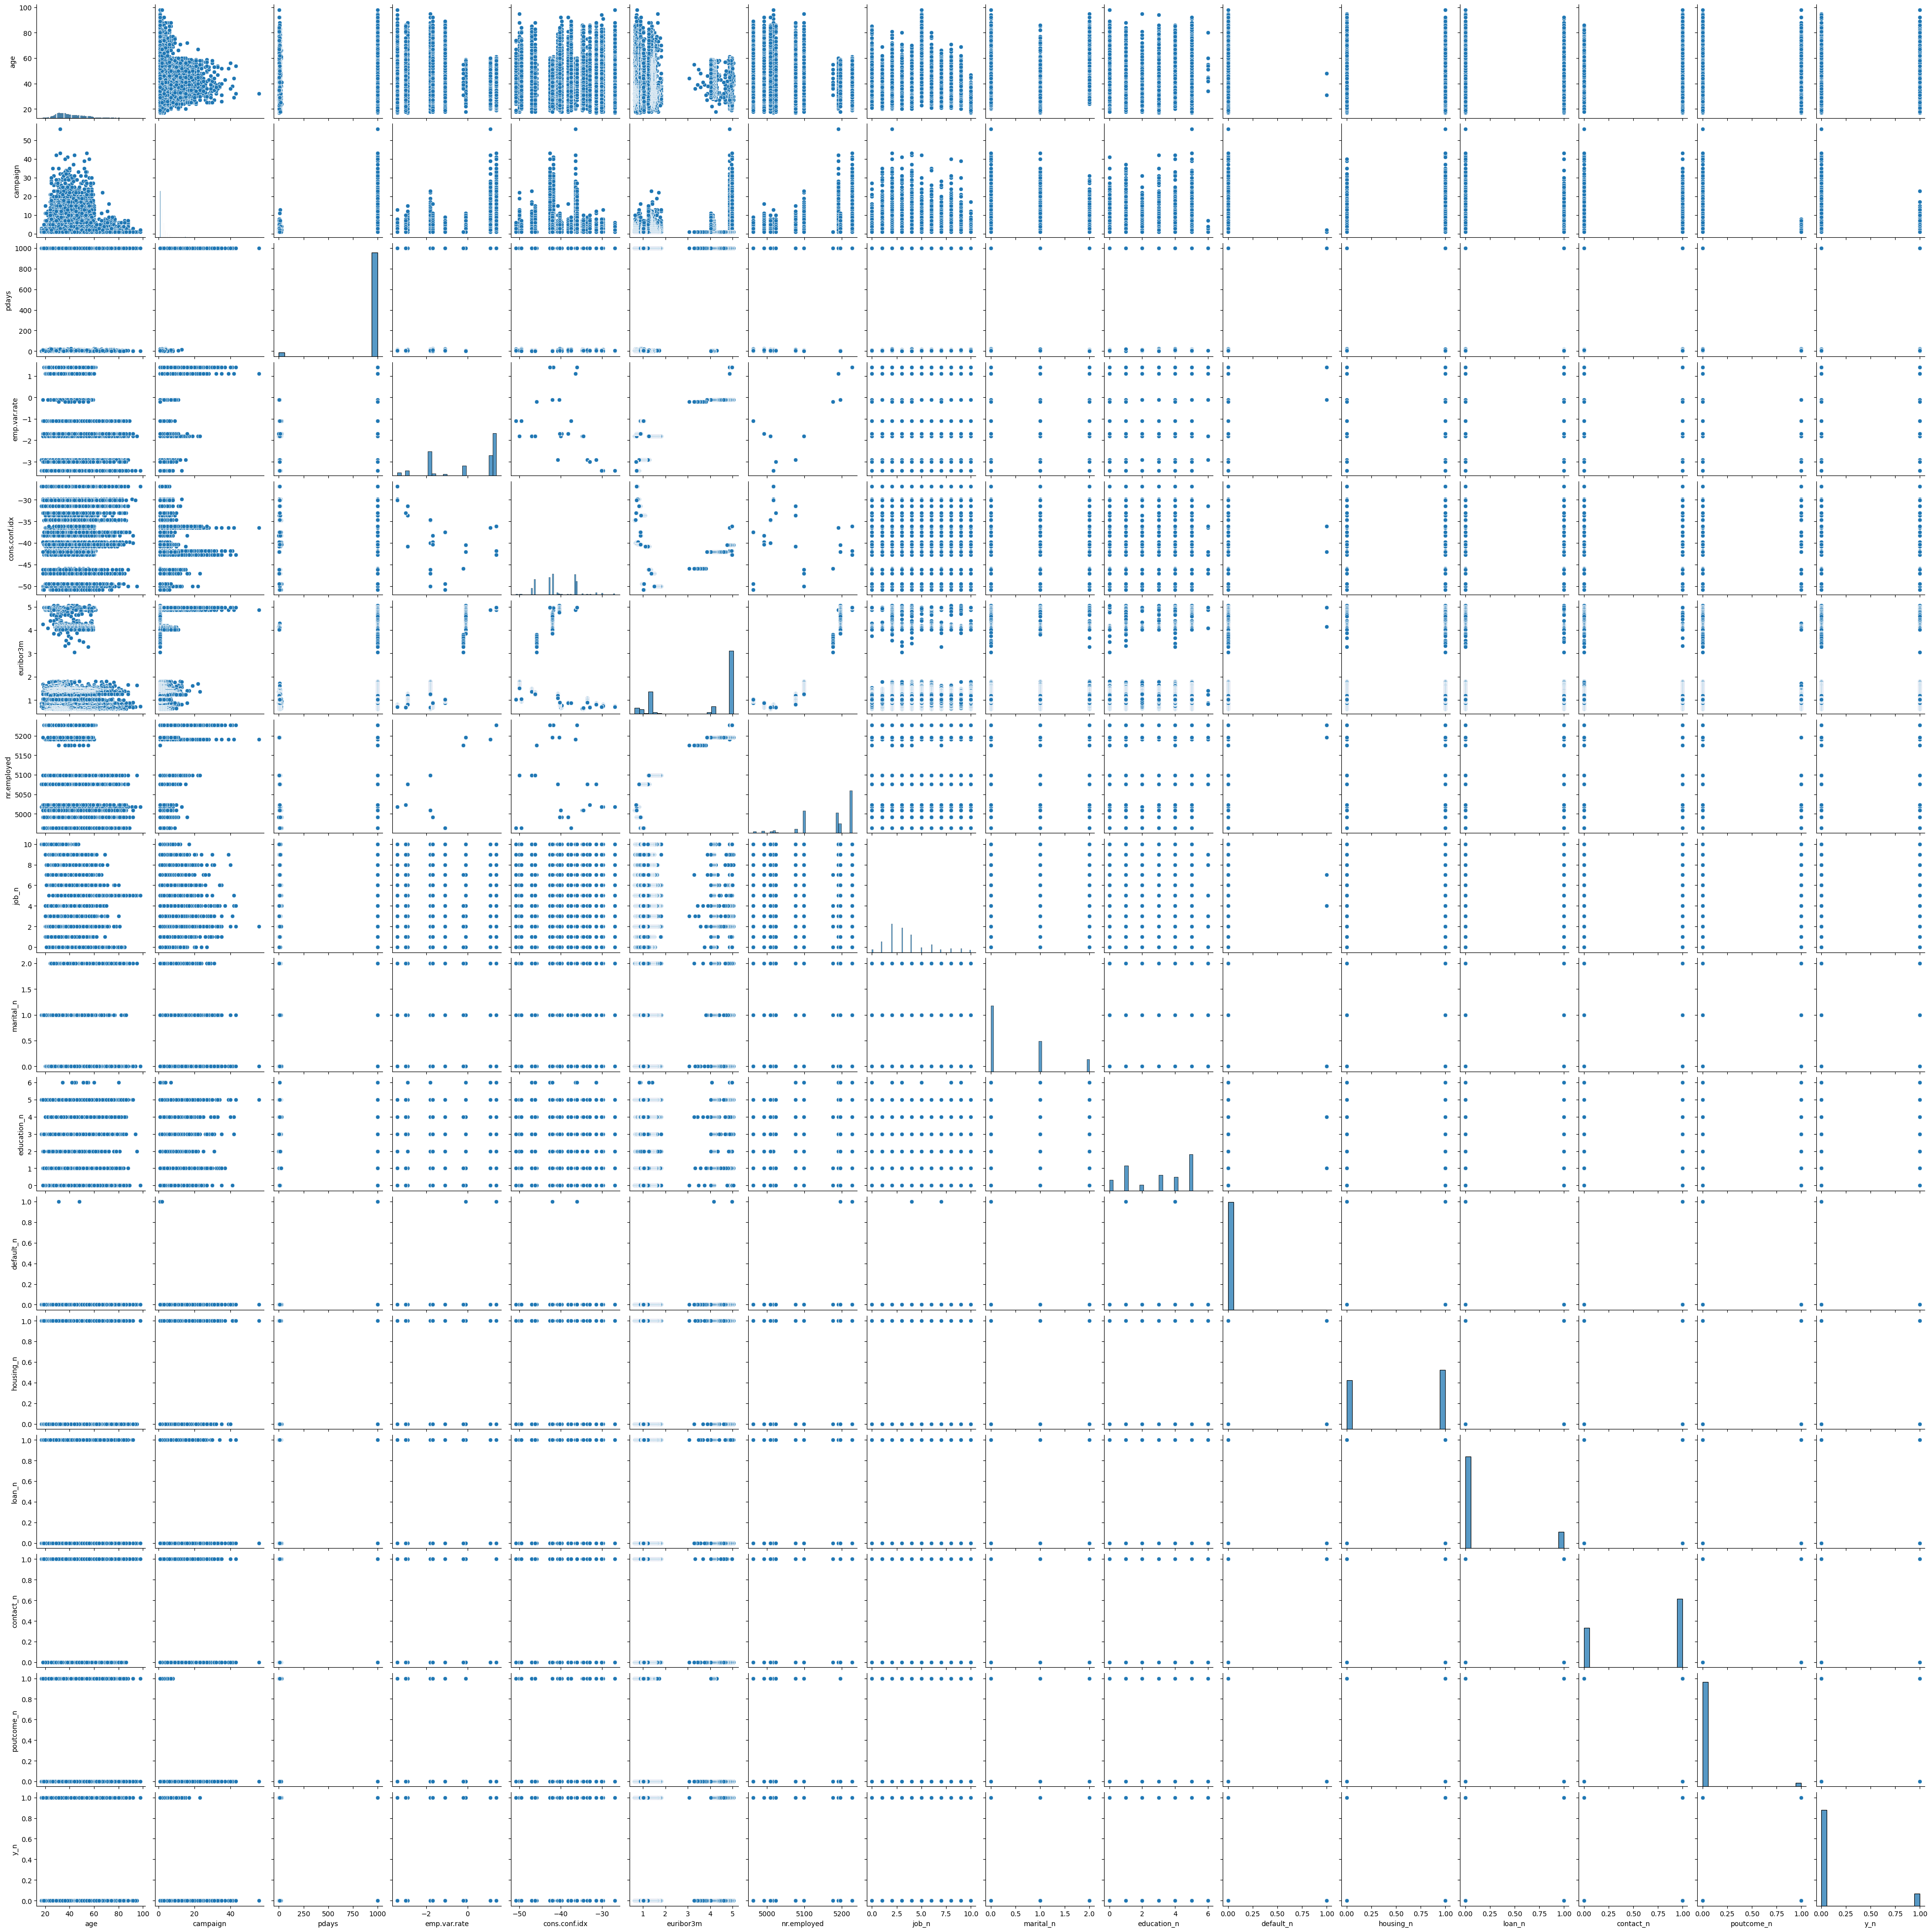

In [39]:
sns.pairplot(data=df_n)
plt.show()

**STEP 5: FEATURE ENGINEERING***

**5.1 OUTLIER ANALYSIS**

In [40]:
# Generates descriptive statistics for the DataFrame `df_n` and rounds them to 2 decimal places
df_stats = df_n.describe().round(2)
df_stats

,age,campaign,pdays,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n,y_n
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,2.57,962.46,0.08,-40.50,3.62,5167.03,3.56,0.50,2.98,0.00,0.55,0.15,0.63,0.03,0.11
std,10.42,2.77,186.94,1.57,4.63,1.73,72.25,2.26,0.69,1.84,0.01,0.50,0.36,0.48,0.18,0.32
min,17.00,1.00,0.00,-3.40,-50.80,0.63,4963.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,1.00,999.00,-1.80,-42.70,1.34,5099.10,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,38.00,2.00,999.00,1.10,-41.80,4.86,5191.00,3.00,0.00,3.00,0.00,1.00,0.00,1.00,0.00,0.00
75%,47.00,3.00,999.00,1.40,-36.40,4.96,5228.10,4.00,1.00,5.00,0.00,1.00,0.00,1.00,0.00,0.00
max,98.00,56.00,999.00,1.40,-26.90,5.04,5228.10,10.00,2.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00


Based on the descriptive statistics, it is possible to observe that:

* **mean-** The mean is affected by 

* **Standard deviation-** The high variability confirms the 

* **min-** The minimum values ​​seem reasonable and reflect the 

* **25%, 50% and 75%-** The quartiles indicate 

* **max-** The maximum values ​​are

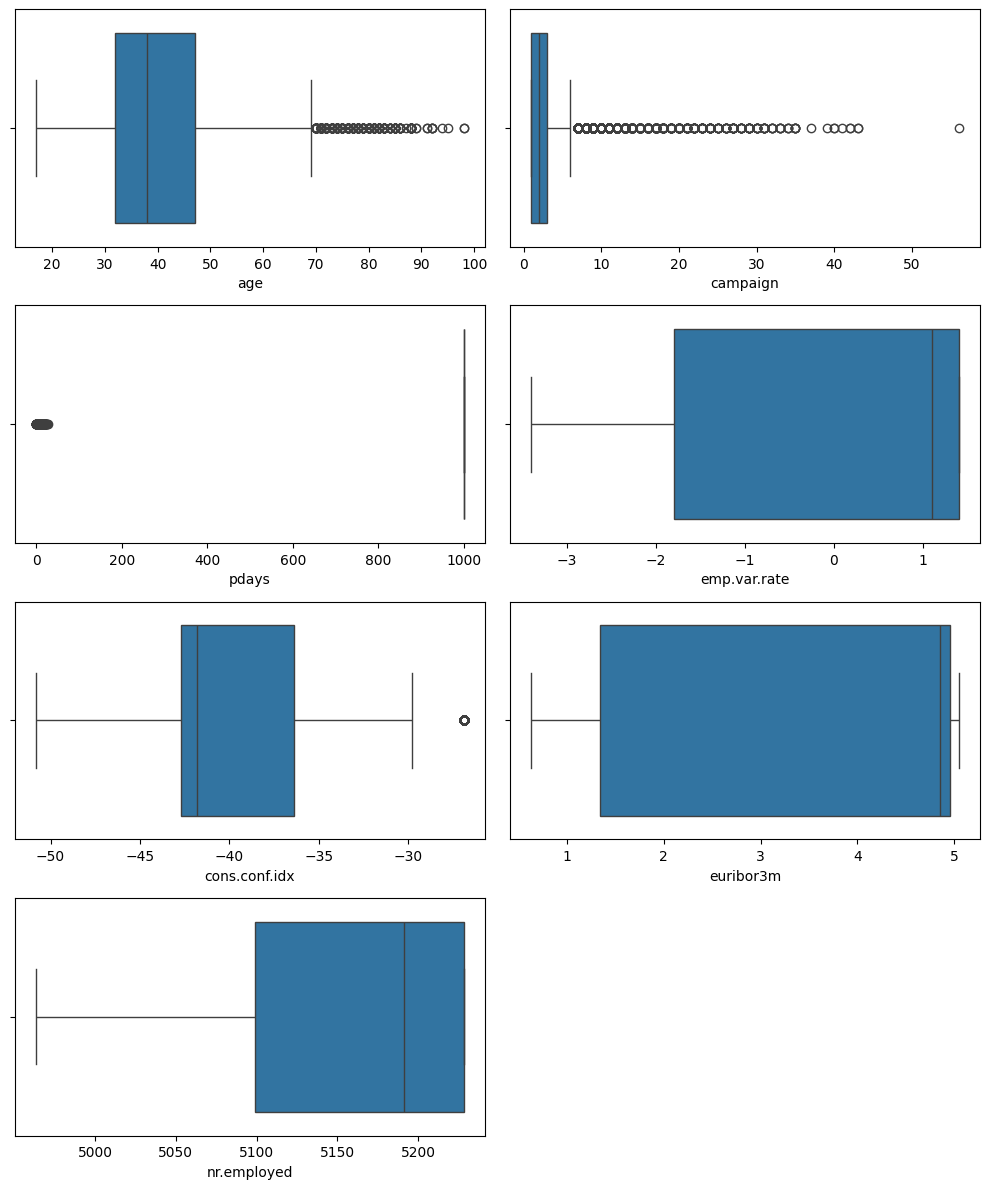

In [41]:
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = df_n, x='age')
sns.boxplot(ax = ax[0,1], data = df_n, x='campaign')

sns.boxplot(ax = ax[1,0], data = df_n, x='pdays')
sns.boxplot(ax = ax[1,1], data = df_n, x='emp.var.rate')

sns.boxplot(ax = ax[2,0], data = df_n, x='cons.conf.idx')
sns.boxplot(ax = ax[2,1], data = df_n, x='euribor3m')

sns.boxplot(ax = ax[3,0], data = df_n, x='nr.employed')

# Remove the empty subplot
fig.delaxes(ax[3, 1])

plt.tight_layout()
plt.show()

The following variables are essential for outlier treatment, as they are important for understanding price behavior, listing popularity, and host profiles:
* **age** - The treatment of outliers in age is necessary to better reflect the predominant age range among customers, avoiding very high age ranges from distorting the profile analysis;
* **campaign** - The campaign variable (number of contacts during the current campaign) presents significant outliers, which may indicate excessive contacts with certain customers. The treatment of these outliers is important to understand the impact of the number of contacts without extreme cases distorting the conclusions.
* **pdays** - The number of days since the last contact in a previous campaign (pdays) presents extreme values ​​in 999, indicating customers not previously contacted. These extreme values ​​can be treated as a specific category or filled as null values, to adequately reflect cases of new contact.

The outlier limits created will be used to perform a new dataframe without outliers (df_without_outliers), which we will use to train our model and compare performance to determine the best approach.

In [42]:
df_with_outliers = df_n.copy()

In [43]:
df_without_outliers = df_n.copy()

In [44]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'./enc/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [45]:
df_without_outliers['age'] = remove_outliers(df_without_outliers['age'], 'age')
df_without_outliers['campaign'] = remove_outliers(df_without_outliers['campaign'], 'campaign')
df_without_outliers['pdays'] = remove_outliers(df_without_outliers['pdays'], 'pdays')

In [46]:
df_with_outliers.head()

,age,campaign,pdays,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n,y_n
0,56,1,999,1.1,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0
1,57,1,999,1.1,-36.4,4.857,5191.0,1,0,1,0,0,0,0,0,0
2,37,1,999,1.1,-36.4,4.857,5191.0,1,0,1,0,1,0,0,0,0
3,40,1,999,1.1,-36.4,4.857,5191.0,2,0,2,0,0,0,0,0,0
4,56,1,999,1.1,-36.4,4.857,5191.0,1,0,1,0,0,1,0,0,0


In [47]:
df_without_outliers.head()

,age,campaign,pdays,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n,y_n
0,56.0,1.0,999.0,1.1,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0
1,57.0,1.0,999.0,1.1,-36.4,4.857,5191.0,1,0,1,0,0,0,0,0,0
2,37.0,1.0,999.0,1.1,-36.4,4.857,5191.0,1,0,1,0,1,0,0,0,0
3,40.0,1.0,999.0,1.1,-36.4,4.857,5191.0,2,0,2,0,0,0,0,0,0
4,56.0,1.0,999.0,1.1,-36.4,4.857,5191.0,1,0,1,0,0,1,0,0,0


In [48]:
# Removendo a coluna pdays do conjunto de dados

df_with_outliers.drop(columns=['pdays'], inplace=True)
df_without_outliers.drop(columns=['pdays'], inplace=True)

In [49]:
df_with_outliers.head()

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n,y_n
0,56,1,1.1,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0
1,57,1,1.1,-36.4,4.857,5191.0,1,0,1,0,0,0,0,0,0
2,37,1,1.1,-36.4,4.857,5191.0,1,0,1,0,1,0,0,0,0
3,40,1,1.1,-36.4,4.857,5191.0,2,0,2,0,0,0,0,0,0
4,56,1,1.1,-36.4,4.857,5191.0,1,0,1,0,0,1,0,0,0


In [50]:
df_without_outliers.head()

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n,y_n
0,56.0,1.0,1.1,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0
1,57.0,1.0,1.1,-36.4,4.857,5191.0,1,0,1,0,0,0,0,0,0
2,37.0,1.0,1.1,-36.4,4.857,5191.0,1,0,1,0,1,0,0,0,0
3,40.0,1.0,1.1,-36.4,4.857,5191.0,2,0,2,0,0,0,0,0,0
4,56.0,1.0,1.1,-36.4,4.857,5191.0,1,0,1,0,0,1,0,0,0


**5.2 MISSING VALUES**

In [51]:
# Count the number of missing values ​​(NaN) in each column of the DataFrame `df_with_outliers`
df_with_outliers.isnull().sum()

age              0
campaign         0
emp.var.rate     0
cons.conf.idx    0
euribor3m        0
nr.employed      0
job_n            0
marital_n        0
education_n      0
default_n        0
housing_n        0
loan_n           0
contact_n        0
poutcome_n       0
y_n              0
dtype: int64

#### Statement
As we can see, there are no missing values.

**5.3 SPLIT TRAIN/TEST OF BOTH DATAFRAMES**

In [52]:
# Function to split data into training and testing

def split(target, df, test_size=0.2, random_state=123):
    """
   Splits a dataframe into training and testing sets.

    Parameters:
    - target: string, target column we want to predict
    - df: DataFrame, the full dataframe we want to split
    - test_size: float, size of the test set
    - random_state: int, sets the seed for reproducibility

    Returns:
    - X_train, X_test, y_train, y_test: training and testing sets
    """
    
    X = df.drop(columns=target)  # Remove a coluna alvo das features
    y = df[target]  # Define apenas a coluna alvo como y

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test


In [ ]:
import os

# Function to export datasets to CSV files
def export_data(X_train, X_test, y_train, y_test, filename):
    """
    Exporta os conjuntos de treino e teste para arquivos CSV.
    
    Parâmetros:
    - X_train, X_test, y_train, y_test: conjuntos de dados para exportar
    - filename: string, o nome base do arquivo para diferenciar os conjuntos (ex.: "with_outliers")
    """
    # Define o diretório de destino, garante que exista
    dir_path = '../data/processed'
    os.makedirs(dir_path, exist_ok=True)

    # Salva os conjuntos de dados como arquivos CSV
    X_train.to_csv(os.path.join(dir_path, f'X_train_{filename}.csv'), index=False)
    X_test.to_csv(os.path.join(dir_path, f'X_test_{filename}.csv'), index=False)
    y_train.to_csv(os.path.join(dir_path, 'y_train.csv'), index=False)
    y_test.to_csv(os.path.join(dir_path, 'y_test.csv'), index=False)

# Aplicação da função export_data para dados com e sem outliers

# WITH OUTLIERS
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = split(
    target="y_n",
    df=df_with_outliers
)
export_data(X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers, 'with_outliers')

# WITHOUT OUTLIERS
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers = split(
    target="y_n",
    df=df_without_outliers
)
export_data(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers, 'without_outliers')


In [54]:
# View train and test data for verification (optional)
X_train_with_outliers.head()

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n
12787,38,1,1.4,-42.7,4.962,5228.1,2,0,1,0,0,0,1,0
24409,39,1,-0.1,-42.0,4.191,5195.8,3,0,4,0,0,0,1,0
39632,24,2,-1.8,-40.0,0.682,5008.7,10,1,1,0,1,0,1,0
41176,38,1,-1.1,-50.8,1.031,4963.6,0,2,1,0,1,1,1,0
5988,32,1,1.1,-36.4,4.857,5191.0,4,1,1,0,1,0,0,0


In [55]:
# Displays the first five rows of the `X_train_without_outliers` DataFrame for a quick preview of the data.
X_train_without_outliers.head()

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,poutcome_n
12787,38.0,1.0,1.4,-42.7,4.962,5228.1,2,0,1,0,0,0,1,0
24409,39.0,1.0,-0.1,-42.0,4.191,5195.8,3,0,4,0,0,0,1,0
39632,24.0,2.0,-1.8,-40.0,0.682,5008.7,10,1,1,0,1,0,1,0
41176,38.0,1.0,-1.1,-50.8,1.031,4963.6,0,2,1,0,1,1,1,0
5988,32.0,1.0,1.1,-36.4,4.857,5191.0,4,1,1,0,1,0,0,0


In [56]:
# Displays the first five rows of the `X_train_with_outliers` DataFrame for a quick preview of the data.
y_train_with_outliers.head()

12787    0
24409    0
39632    0
41176    0
5988     0
Name: y_n, dtype: int64

**5.4 NORMALIZATION**

In [65]:
def normalize_and_save(X_train, X_test, filename):
    """
    Normalizes the data using StandardScaler and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_norm: DataFrame with the normalized training data
    - X_test_norm: DataFrame with the normalized testing data
    """

    # Initialize and adjusts the scaler
    scaler = StandardScaler()
    scaler.fit(X_train)  # Ajusta o scaler com os dados de treino

    # Apply normalization to training and testing data
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_norm, X_test_norm

# Application of the function to normalize data with and without outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = normalize_and_save(
    X_train_with_outliers, X_test_with_outliers, 'normalized_with_outliers'
)

X_train_without_outliers_norm, X_test_without_outliers_norm = normalize_and_save(
    X_train_without_outliers, X_test_without_outliers, 'normalized_without_outliers'
)


**5.5 min-MAX Scaling**

In [58]:
def minmax_and_save(X_train, X_test, filename):
    """
    Applies Min-Max Scaling to the data and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_minmax: DataFrame with the scaled training data
    - X_test_minmax: DataFrame with the scaled testing data
    """

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler with training data

    # Apply Min-Max Scaling to training and testing data
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'./enc/{filename}.sav')

    return X_train_minmax, X_test_minmax

# Applying the function to scale data with and without outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax_and_save(
    X_train_with_outliers, X_test_with_outliers, 'minmax_with_outliers'
)

X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax_and_save(
    X_train_without_outliers, X_test_without_outliers, 'minmax_without_outliers'
)


**5.6 FEATURE SELECTION**

In [59]:
def kselection_and_save(X_train, X_test, y_train, k, filename):
    """
    Applies feature selection using SelectKBest and saves the model for future use.

    Parameters:
    - X_train: DataFrame with training data
    - X_test: DataFrame with testing data
    - y_train: Series with target training data
    - k: Number of features to select
    - filename: String, the name of the file to save the selection model

    Returns:
    - X_train_sel: DataFrame with selected features from training data
    - X_test_sel: DataFrame with selected features from testing data
    """
    # Creates the feature selection model
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    # Select columns based on model
    selected_columns = X_train.columns[selection_model.get_support()]

    # Transforms training and testing data to keep only selected features
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

    # Save the selection model
    joblib.dump(selection_model, f'./enc/{filename}.sav')

    return X_train_sel, X_test_sel

# Application of the function to select features with and without outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection_and_save(
    X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, 7, 'selection_model_with_outliers'
)

X_train_without_outliers_sel, X_test_without_outliers_sel = kselection_and_save(
    X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, 7, 'selection_model_without_outliers'
)


**Applying the filter to the normalized and minmax scaled data frames**

In [60]:
# Applying the filter to normalized and Min-Max Scaling datasets

# Normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Scaled data with Min-Max
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]


**Saving the CSV files**

In [61]:
# Base directory to save files
base_path = os.path.join('../data', 'processed')

# Lists of training and testing dataframes for easy export
dfs_train = [
    X_train_with_outliers_sel, X_train_without_outliers_sel,
    X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel,
    X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel
]

dfs_test = [
    X_test_with_outliers_sel, X_test_without_outliers_sel,
    X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel,
    X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel
]

# File names for training and testing sets
train_file_names = [
    "X_train_with_outliers_sel.csv", "X_train_without_outliers_sel.csv",
    "X_train_with_outliers_norm_sel.csv", "X_train_without_outliers_norm_sel.csv",
    "X_train_with_outliers_minmax_sel.csv", "X_train_without_outliers_minmax_sel.csv"
]

test_file_names = [
    "X_test_with_outliers_sel.csv", "X_test_without_outliers_sel.csv",
    "X_test_with_outliers_norm_sel.csv", "X_test_without_outliers_norm_sel.csv",
    "X_test_with_outliers_minmax_sel.csv", "X_test_without_outliers_minmax_sel.csv"
]

# Saving the training dataframes
for df, file_name in zip(dfs_train, train_file_names):
    df.to_csv(os.path.join(base_path, file_name), index=False)

# Saving the test dataframes
for df, file_name in zip(dfs_test, test_file_names):
    df.to_csv(os.path.join(base_path, file_name), index=False)



**MACHINE LEARNING**

**1. CHOOSING THE BEST DATASET**

In [62]:

# Train dataframes - loading the training set
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()

# Test dataframes - loading the test set
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

# Check dimensions and data types
print("Checking dimensions:")
print(f"X_train_with_outliers_sel: {X_train_with_outliers_sel.shape}, y_train: {y_train.shape}")
print(f"X_test_with_outliers_sel: {X_test_with_outliers_sel.shape}, y_test: {y_test.shape}")

# Check the first few rows for data consistency
print("Preview of X_train_with_outliers_sel:")
print(X_train_with_outliers_sel.head())
print("Pré-visualização de y_train:")
print(y_train.head())

# Check if all columns are numeric
print("Data types in X_train_with_outliers_sel:")
print(X_train_with_outliers_sel.dtypes)

Checking dimensions:
X_train_with_outliers_sel: (32940, 7), y_train: (32940,)
X_test_with_outliers_sel: (8236, 7), y_test: (8236,)
Preview of X_train_with_outliers_sel:
   campaign  emp.var.rate  cons.conf.idx  euribor3m  nr.employed  contact_n  \
0       1.0           1.4          -42.7      4.962       5228.1        1.0   
1       1.0          -0.1          -42.0      4.191       5195.8        1.0   
2       2.0          -1.8          -40.0      0.682       5008.7        1.0   
3       1.0          -1.1          -50.8      1.031       4963.6        1.0   
4       1.0           1.1          -36.4      4.857       5191.0        0.0   

   poutcome_n  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
Pré-visualização de y_train:
0    0
1    0
2    0
3    0
4    0
Name: y_n, dtype: int64
Data types in X_train_with_outliers_sel:
campaign         float64
emp.var.rate     float64
cons.conf.idx    float64
euribor3m        float64
nr.employed      float64
contac

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define training and testing sets for different preprocessing
train_dfs = [ 
    X_train_with_outliers_sel,
    X_train_without_outliers_sel,
    X_train_with_outliers_norm_sel,
    X_train_without_outliers_norm_sel,
    X_train_with_outliers_minmax_sel,
    X_train_without_outliers_minmax_sel
]
test_dfs = [
    X_test_with_outliers_sel,
    X_test_without_outliers_sel,
    X_test_with_outliers_norm_sel,
    X_test_without_outliers_norm_sel,
    X_test_with_outliers_minmax_sel,
    X_test_without_outliers_minmax_sel
]

# Data scaling (optional)
#scaler = StandardScaler()
#train_dfs_scaled = [scaler.fit_transform(X) for X in train_dfs]
#test_dfs_scaled = [scaler.transform(X) for X in test_dfs]

# Results to store the metrics of each model and dataset
results = []

# Initial evaluation of each dataset with additional metrics
for df_index, (X_train, X_test) in enumerate(zip(train_dfs, test_dfs)):
    model = LogisticRegression(max_iter=1000, solver='liblinear')  # increase max_iter to solve the convergence problem
    model.fit(X_train, y_train.values.ravel())  # Convert y_train to 1D
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Collecting performance metrics
    results.append({
        "index": df_index,
        "train_accuracy": accuracy_score(y_train, y_train_pred),
        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "train_precision": precision_score(y_train, y_train_pred),
        "test_precision": precision_score(y_test, y_test_pred),
        "train_recall": recall_score(y_train, y_train_pred),
        "test_recall": recall_score(y_test, y_test_pred),
        "train_f1": f1_score(y_train, y_train_pred),
        "test_f1": f1_score(y_test, y_test_pred)
    })

# Sort and display results based on test accuracy
results_sorted = sorted(results, key=lambda x: x["test_accuracy"], reverse=True)
for res in results_sorted:
    print(f"Dataset Index: {res['index']}")
    print(f"Train Accuracy: {res['train_accuracy']}, Test Accuracy: {res['test_accuracy']}")
    print(f"Train Precision: {res['train_precision']}, Test Precision: {res['test_precision']}")
    print(f"Train Recall: {res['train_recall']}, Test Recall: {res['test_recall']}")
    print(f"Train F1 Score: {res['train_f1']}, Test F1 Score: {res['test_f1']}")
    print("-" * 30)

Dataset Index: 2
Train Accuracy: 0.900333940497875, Test Accuracy: 0.8949732880038854
Train Precision: 0.7313769751693002, Test Precision: 0.6784140969162996
Train Recall: 0.17546709991876522, Test Recall: 0.16279069767441862
Train F1 Score: 0.2830312295260974, Test F1 Score: 0.2625745950554135
------------------------------
Dataset Index: 3
Train Accuracy: 0.900333940497875, Test Accuracy: 0.8949732880038854
Train Precision: 0.7313769751693002, Test Precision: 0.6784140969162996
Train Recall: 0.17546709991876522, Test Recall: 0.16279069767441862
Train F1 Score: 0.2830312295260974, Test F1 Score: 0.2625745950554135
------------------------------
Dataset Index: 4
Train Accuracy: 0.900333940497875, Test Accuracy: 0.8949732880038854
Train Precision: 0.7313769751693002, Test Precision: 0.6784140969162996
Train Recall: 0.17546709991876522, Test Recall: 0.16279069767441862
Train F1 Score: 0.2830312295260974, Test F1 Score: 0.2625745950554135
------------------------------
Dataset Index: 5
Tr

The datasets that presented the best performance were **Index 4** and **Index 2**, with Dataset Index 4 standing out. It has the highest accuracy in both training and testing, and Precision, Recall, and F1 Score values ​​that are among the best.
Therefore, **based on the metrics presented**, Dataset **Index 4** seems to be the **best choice** for continuing the development and fine-tuning of the model.

Melhor modelo após ajuste de hiperparâmetros:
Acurácia no conjunto de teste: 0.8949732880038854
Melhores hiperparâmetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


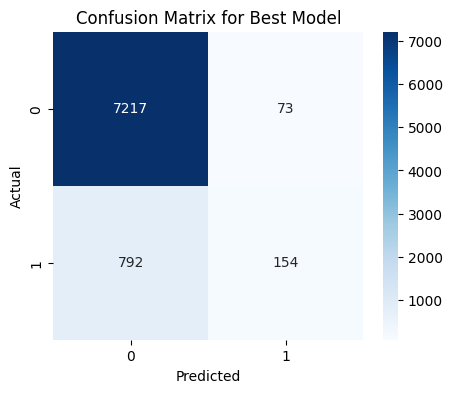

In [64]:
# Choose the best dataset based on previous analysis to tune the hyperparameters
# Dataset with the best performance:
#   Training set: X_train_with_outliers_minmax_sel
#   Test set: X_test_with_outliers_minmax_sel

# Select the best dataset based on previous analysis
X_train_best = X_train_with_outliers_minmax_sel
X_test_best = X_test_with_outliers_minmax_sel

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' suporta penalidades 'l1' e 'l2'
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_best, y_train.values.ravel())  # Converting y_train to 1D
best_model = grid_search.best_estimator_

# Evaluation of the fitted model on the test data
y_test_pred_best = best_model.predict(X_test_best)
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print("Melhor modelo após ajuste de hiperparâmetros:")
print(f"Acurácia no conjunto de teste: {test_accuracy}")
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Confusion Matrix for the best model
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Model")
plt.show()

##### STATEMENTS

**Verdadeiros Negativos (TN): 7217** — cases where the model correctly predicted that the customer would not take out the deposit (class 0).

**Falsos Positivos (FP): 73** —  cases where the model predicted that the client would contract the deposit, but in fact he did not contract it (model error).

**Falsos Negativos (FN): 792** — cases where the model predicted that the client would not contract the deposit, but he did (model error).

**Verdadeiros Positivos (TP): 154** — cases where the model correctly predicted that the customer would contract the deposit (class 1).

#### **FINAL STATEMENT:**

The model is more efficient at correctly identifying customers who will not take out the deposit (class 0), but is not as effective at identifying those who will take out the deposit (class 1). This behavior suggests that the model may be useful for reducing efforts with customers who have a low probability of taking out the deposit, but it misses a considerable portion of potential customers.